<H1>Import Libraries</H1>

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
pd.set_option('display.max_rows', 100)

from DDANucleosideFinder import DDANF, DDANF_Plots

<H1>Identify Nucleosides</H1>

In [2]:
start = time.time()

#------files to read in (ms1=.ms1; ms2=.mgf)
list_of_files1, list_of_labels1 = DDANF_Plots.create_Input_File_List('msfilelist1.txt')

#------create empty dataframes
combined_raw_results = pd.DataFrame()
combined_summary_results = pd.DataFrame()

#------load up empty dataframes with nucleoside candidates
#for item1 in filename_list:
for item1 in list_of_files1:
    df_A, df_B = DDANF.find_Nucleosides_From_MS2(item1, 10, 25)
    combined_raw_results = pd.concat([combined_raw_results, df_A])
    combined_summary_results = pd.concat([combined_summary_results, df_B])

#------assign identities to nucleoside candidates (when possible)
identity_column1 = []
filename_to_sample_column1 = []

for row1 in combined_summary_results.itertuples():
    temp_list2 = DDANF.assign_Nucleotides_to_Masses(row1.ms2_mz, 50)
    identity_column1.append(temp_list2)
    for item1 in list_of_labels1:
        if item1[0] == row1.filename:
            temp_sample_name2 = item1[1]
    filename_to_sample_column1.append(temp_sample_name2)

combined_summary_results['sample'] = filename_to_sample_column1
combined_summary_results['candidate_ID'] = identity_column1

end = time.time()
print(end-start)

3225
3208
3253
3238
3220
3209
3257
3229
3250
3172
3268
3251
3276
3174
3168
3093
2475
1880
3285
3102
3145
3168
222.19866919517517


<H1>Nucleosides Identified</H1>

In [6]:
combined_raw_results

,scan,retention_sec,precursor_mz,precursor_intensity,charge,ms2_mz,ms2_intensity,ms2_max_intensity,ms2_relative_intensity,ms1_ms2_diff,filename
0,38,2.472075,175.095703,6.415317e+06,1,59.047464,2536.388184,101686.492188,2.5,116.0,../Raw_Data/Arcadia1
1,38,2.472075,175.095703,6.415317e+06,1,59.048009,6942.949219,101686.492188,6.8,116.0,../Raw_Data/Arcadia1
2,38,2.472075,175.095703,6.415317e+06,1,59.048554,11728.405273,101686.492188,11.5,116.0,../Raw_Data/Arcadia1
3,38,2.472075,175.095703,6.415317e+06,1,59.049099,13576.716797,101686.492188,13.4,116.0,../Raw_Data/Arcadia1
4,38,2.472075,175.095703,6.415317e+06,1,59.049643,9546.836914,101686.492188,9.4,116.0,../Raw_Data/Arcadia1
...,...,...,...,...,...,...,...,...,...,...,...
1940,10179,656.274341,227.126773,1.227211e+07,1,95.086513,2348.397705,149827.359375,1.6,132.0,../Raw_Data/Blank04
1941,10230,659.498330,227.126813,1.202869e+07,1,95.083174,2153.609131,137501.437500,1.6,132.0,../Raw_Data/Blank04
1942,10230,659.498330,227.126813,1.202869e+07,1,95.084288,4323.288086,137501.437500,3.1,132.0,../Raw_Data/Blank04
1943,10230,659.498330,227.126813,1.202869e+07,1,95.085401,3380.075439,137501.437500,2.5,132.0,../Raw_Data/Blank04


In [7]:
combined_summary_results

,precursor_mz,precursor_intensity,charge,ms2_mz,ms2_intensity,ms2_max_intensity,ms2_relative_intensity,ms1_ms2_diff,filename,sample,candidate_ID
rounded_precursor,,,,,,,,,,,
172.096,172.096069,5.395711e+07,1,56.048801,111500.558594,248002.953125,45.0,116.000000,../Raw_Data/Arcadia1,'Eligo4',[]
175.095,175.095458,5.732524e+06,1,59.048793,13151.354004,97320.355469,13.5,116.000000,../Raw_Data/Arcadia1,'Eligo4',[]
175.096,175.095810,6.631862e+06,1,59.048969,14548.756545,104024.526853,14.0,116.000000,../Raw_Data/Arcadia1,'Eligo4',[]
176.091,176.090866,2.019972e+07,1,44.049420,24278.658203,200459.765625,12.1,132.000000,../Raw_Data/Arcadia1,'Eligo4',[]
190.107,190.106781,7.639475e+06,1,58.064910,27538.984375,114098.585938,24.2,132.000000,../Raw_Data/Arcadia1,'Eligo4',[]
...,...,...,...,...,...,...,...,...,...,...,...
221.101,221.101186,5.545837e+06,1,89.059129,33404.467627,145266.590625,23.0,132.000000,../Raw_Data/Blank04,'Eligo4',[]
227.127,227.126796,1.985743e+07,1,95.085069,12081.384766,120116.953125,10.1,132.000000,../Raw_Data/Blank04,'Eligo4',[]
305.209,305.209351,1.109568e+08,1,189.161854,34478.854167,228340.109375,15.1,116.033333,../Raw_Data/Blank04,'Eligo4',[]


<H1>Plot Single Mass Trace</H1>

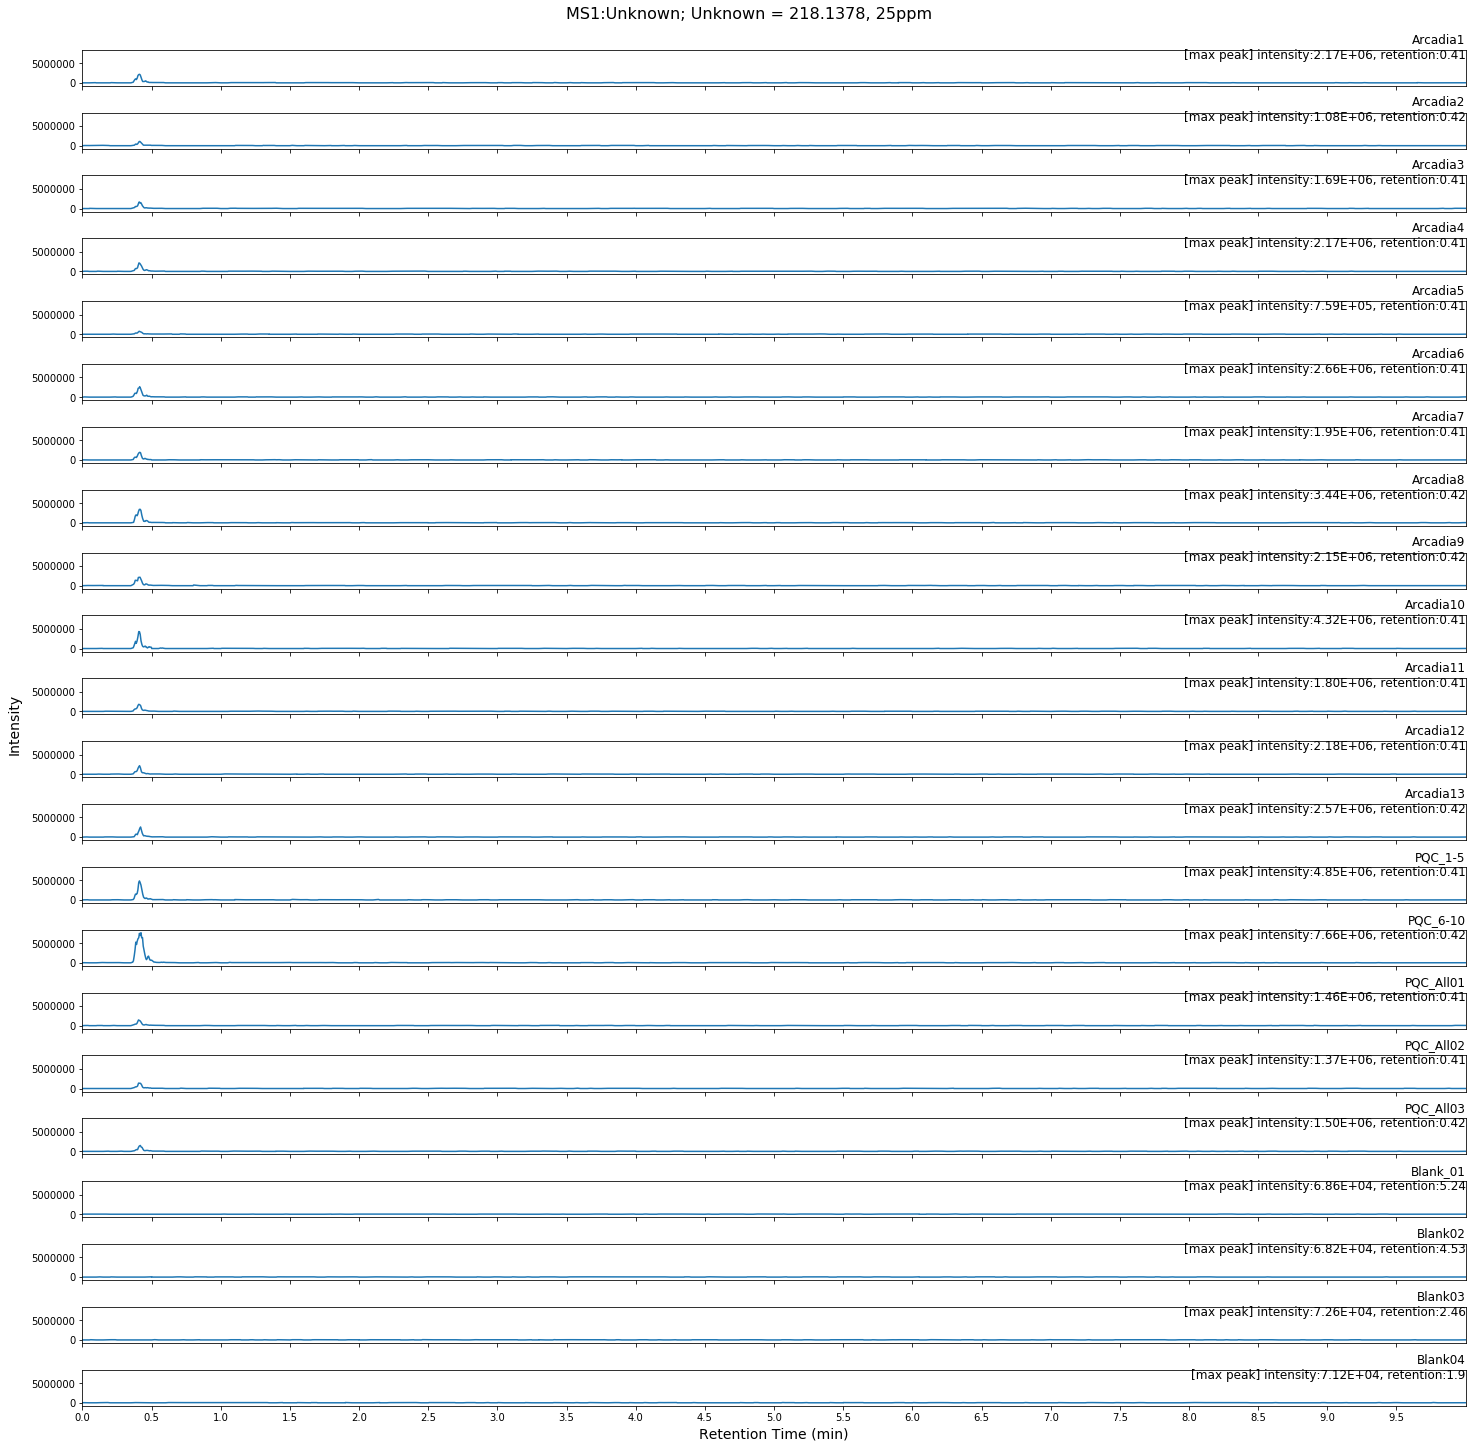

39.38652801513672


In [2]:
start = time.time()

#-----user defined variables
user_defined_mass = 218.1378
user_defined_ppm_tolerance = 25
user_defined_baseline_interval = 0.05
user_defined_molecule = 'Unknown'
user_defined_ion_type = 'Unknown'
save_figure = False
figure_title = 'Manual_X1'
#list_of_files1 = DDANF_Plots.create_Input_File_List('msfilelist1.txt')


#-----processing functions
dictx1 = DDANF_Plots.process_multiple_inputs(list_of_files1, user_defined_mass, user_defined_ppm_tolerance, user_defined_baseline_interval)

DDANF_Plots.plot_multiple_inputs(dictx1, f'MS1:{user_defined_molecule}; {user_defined_ion_type} = {user_defined_mass}, {user_defined_ppm_tolerance}ppm', save_figure, figure_title)

end = time.time()
print(end-start)